<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import pandas_datareader.data as web
from pandas_datareader import data

# 5.1 Data Preparation

# 5.1 (a) Get Data
* Read stock data use pandas_datareader.data from web

In [279]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = data.DataReader(stk_tickers, 'yahoo')
ccy_data = data.DataReader(ccy_tickers, 'fred')
idx_data = data.DataReader(idx_tickers, 'fred')



In [280]:
stk_data

Attributes   Adj Close              ...     Volume           
Symbols           MSFT         IBM  ...        IBM      GOOGL
Date                                ...                      
2017-02-21   60.324902  136.453720  ...  4686394.0  1260300.0
2017-02-22   60.203308  137.127396  ...  3159443.0  1224400.0
2017-02-23   60.446510  137.505936  ...  2387495.0  1386700.0
2017-02-24   60.446510  137.278809  ...  3451905.0  1346200.0
2017-02-27   60.081703  135.802734  ...  3861100.0  1010300.0
...                ...         ...  ...        ...        ...
2022-02-10  302.380005  133.520004  ...  5978600.0  1966500.0
2022-02-11  295.040009  132.690002  ...  4175600.0  1994200.0
2022-02-14  295.000000  130.149994  ...  5344300.0  1713900.0
2022-02-15  300.470001  129.940002  ...  4395700.0  1335600.0
2022-02-16  299.500000  129.179993  ...  4874500.0  1247700.0

[1258 rows x 18 columns]

In [281]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-02-20,NaN,NaN
2017-02-21,113.48,1.2465
2017-02-22,113.46,1.2456
2017-02-23,112.68,1.2548
2017-02-24,112.26,1.2499
...,...,...
2022-02-07,115.09,1.3533
2022-02-08,115.62,1.3552
2022-02-09,115.44,1.3540


In [282]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-20,NaN,NaN,NaN
2017-02-21,2365.38,20743.00,11.57
2017-02-22,2362.82,20775.60,11.74
2017-02-23,2363.81,20810.32,11.71
2017-02-24,2367.34,20821.76,11.47
...,...,...,...
2022-02-10,4504.08,35241.59,23.91
2022-02-11,4418.64,34738.06,27.36
2022-02-14,4401.67,34566.17,28.33




*   Select columns



In [283]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [284]:
base

Date
2017-02-21     60.324902
2017-02-22     60.203308
2017-02-23     60.446510
2017-02-24     60.446510
2017-02-27     60.081703
                 ...    
2022-02-10    302.380005
2022-02-11    295.040009
2022-02-14    295.000000
2022-02-15    300.470001
2022-02-16    299.500000
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [285]:
X1

Attributes    Adj Close            
Symbols           GOOGL         IBM
Date                               
2017-02-21   849.270020  136.453720
2017-02-22   851.359985  137.127396
2017-02-23   851.000000  137.505936
2017-02-24   847.809998  137.278809
2017-02-27   849.669983  135.802734
...                 ...         ...
2022-02-10  2772.399902  133.520004
2022-02-11  2685.649902  132.690002
2022-02-14  2710.520020  130.149994
2022-02-15  2732.169922  129.940002
2022-02-16  2754.760010  129.179993

[1258 rows x 2 columns]

In [286]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-02-20,NaN,NaN
2017-02-21,113.48,1.2465
2017-02-22,113.46,1.2456
2017-02-23,112.68,1.2548
2017-02-24,112.26,1.2499
...,...,...
2022-02-07,115.09,1.3533
2022-02-08,115.62,1.3552
2022-02-09,115.44,1.3540


In [287]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-20,NaN,NaN,NaN
2017-02-21,2365.38,20743.00,11.57
2017-02-22,2362.82,20775.60,11.74
2017-02-23,2363.81,20810.32,11.71
2017-02-24,2367.34,20821.76,11.47
...,...,...,...
2022-02-10,4504.08,35241.59,23.91
2022-02-11,4418.64,34738.06,27.36
2022-02-14,4401.67,34566.17,28.33


# 5.1 (b) Standardized Data
* Standardized data (X1, X2, X3) with kept index (date)

In [288]:
X1_scaler = preprocessing.StandardScaler()
X1_tranfrom = X1_scaler.fit_transform(X1)

X2_scaler = preprocessing.StandardScaler()
X2_tranfrom = X1_scaler.fit_transform(X2)

X3_scaler = preprocessing.StandardScaler()
X3_tranfrom = X1_scaler.fit_transform(X3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [289]:
#scaled_features_df = pd.DataFrame(X1_tranfrom,, index=X1.index, columns=X1.columns)

X1_tranfrom = pd.DataFrame(X1_tranfrom, index=X1.index,  columns = X1.columns)
X2_tranfrom = pd.DataFrame(X2_tranfrom, index=X2.index, columns = X2.columns)
X3_tranfrom = pd.DataFrame(X3_tranfrom, index=X3.index, columns = X3.columns)

In [290]:
X1_tranfrom

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-02-21 -1.060432  1.991963
2017-02-22 -1.056991  2.059871
2017-02-23 -1.057584  2.098028
2017-02-24 -1.062837  2.075133
2017-02-27 -1.059774  1.926343
...              ...       ...
2022-02-10  2.106560  1.696241
2022-02-11  1.963701  1.612576
2022-02-14  2.004657  1.356540
2022-02-15  2.040310  1.335373
2022-02-16  2.077511  1.258763

[1258 rows x 2 columns]

In [291]:
X2_tranfrom

,DEXJPUS,DEXUSUK
DATE,,
2017-02-20,NaN,NaN
2017-02-21,1.372723,-1.302417
2017-02-22,1.365586,-1.319512
2017-02-23,1.087271,-1.144764
2017-02-24,0.937409,-1.237837
...,...,...
2022-02-07,1.947194,0.726183
2022-02-08,2.136306,0.762272
2022-02-09,2.072079,0.739479


In [292]:
X3_tranfrom

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-20,NaN,NaN,NaN
2017-02-21,-1.185361,-1.476403,-0.816162
2017-02-22,-1.189091,-1.468979,-0.796770
2017-02-23,-1.187649,-1.461073,-0.800192
2017-02-24,-1.182505,-1.458467,-0.827570
...,...,...,...
2022-02-10,1.930828,1.825349,0.591515
2022-02-11,1.806338,1.710681,0.985071
2022-02-14,1.781612,1.671536,1.095724




*   Calculate ความแตกต่างของค่า ราคา 'Adj Close', 'MSFT’)ย้อนหลัง return_period วัน



In [293]:
standard_scaler = preprocessing.StandardScaler()
return_period = 3

Y = base.shift(-return_period)
X4_3DT = base.diff(3*return_period).shift(-3*return_period)
X4_6DT = base.diff(6*return_period).shift(-6*return_period)
X4_12DT = base.diff(12*return_period).shift(-12*return_period)

X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [294]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-02-21,-0.259142,-0.298429,-0.513327
2017-02-22,-0.226748,-0.281619,-0.524140
2017-02-23,-0.185631,-0.368333,-0.504678
2017-02-24,-0.218027,-0.295776,-0.511165
2017-02-27,-0.144516,-0.275424,-0.508281
...,...,...,...
2022-02-10,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN
2022-02-14,NaN,NaN,NaN


*  Forming Dataset

In [295]:
X = pd.concat([X1_tranfrom, X2_tranfrom, X3_tranfrom, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [296]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-21,-1.060432,1.991963,1.372723,-1.302417,-1.185361,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
2017-02-22,-1.056991,2.059871,1.365586,-1.319512,-1.189091,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2017-02-23,-1.057584,2.098028,1.087271,-1.144764,-1.187649,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
2017-02-24,-1.062837,2.075133,0.937409,-1.237837,-1.182505,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
...,...,...,...,...,...,...,...,...,...,...
2022-02-10,2.106560,1.696241,2.214805,0.921825,1.930828,1.825349,0.591515,NaN,NaN,NaN
2022-02-11,1.963701,1.612576,2.239782,0.855345,1.806338,1.710681,0.985071,NaN,NaN,NaN
2022-02-14,2.004657,1.356540,NaN,NaN,1.781612,1.671536,1.095724,NaN,NaN,NaN
2022-02-15,2.040310,1.335373,NaN,NaN,1.882731,1.767791,0.795708,NaN,NaN,NaN


In [297]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-21,60.446510,-1.060432,1.991963,1.372723,-1.302417,-1.185361,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
2017-02-22,60.081703,-1.056991,2.059871,1.365586,-1.319512,-1.189091,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2017-02-23,59.847855,-1.057584,2.098028,1.087271,-1.144764,-1.187649,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
2017-02-24,60.745853,-1.062837,2.075133,0.937409,-1.237837,-1.182505,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-10,300.470001,2.106560,1.696241,2.214805,0.921825,1.930828,1.825349,0.591515,NaN,NaN,NaN
2022-02-11,299.500000,1.963701,1.612576,2.239782,0.855345,1.806338,1.710681,0.985071,NaN,NaN,NaN
2022-02-14,NaN,2.004657,1.356540,NaN,NaN,1.781612,1.671536,1.095724,NaN,NaN,NaN
2022-02-15,NaN,2.040310,1.335373,NaN,NaN,1.882731,1.767791,0.795708,NaN,NaN,NaN


# 5.1 (c) Data Preparation
* Drop NA

In [298]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2017-02-20 to 2022-02-16
Freq: B
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1255 non-null   float64
 1   (Adj Close, GOOGL)  1258 non-null   float64
 2   (Adj Close, IBM)    1258 non-null   float64
 3   DEXJPUS             1243 non-null   float64
 4   DEXUSUK             1243 non-null   float64
 5   SP500               1258 non-null   float64
 6   DJIA                1258 non-null   float64
 7   VIXCLS              1257 non-null   float64
 8   MSFT_3DT            1249 non-null   float64
 9   MSFT_6DT            1240 non-null   float64
 10  MSFT_12DT           1222 non-null   float64
dtypes: float64(11)
memory usage: 122.2 KB


In [299]:
dataset.dropna(inplace=True)

In [300]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1206 entries, 2017-02-21 to 2021-12-27
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1206 non-null   float64
 1   (Adj Close, GOOGL)  1206 non-null   float64
 2   (Adj Close, IBM)    1206 non-null   float64
 3   DEXJPUS             1206 non-null   float64
 4   DEXUSUK             1206 non-null   float64
 5   SP500               1206 non-null   float64
 6   DJIA                1206 non-null   float64
 7   VIXCLS              1206 non-null   float64
 8   MSFT_3DT            1206 non-null   float64
 9   MSFT_6DT            1206 non-null   float64
 10  MSFT_12DT           1206 non-null   float64
dtypes: float64(11)
memory usage: 113.1 KB


* view statistics

In [301]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,153.977545,-0.063150,-0.042047,-0.049683,-0.020293,-0.061730,-0.057623,-0.013544,0.031442,0.023506,-0.001321
std,76.231703,0.946282,0.972650,0.964154,1.004517,0.950466,0.961157,1.011334,0.948430,0.960658,1.002946
min,59.847855,-1.083702,-3.513788,-2.537964,-3.150571,-1.371834,-1.966265,-1.093363,-4.044324,-5.159007,-3.876351
25%,92.291737,-0.685858,-0.585746,-0.710182,-0.683200,-0.729578,-0.655326,-0.687258,-0.335698,-0.356810,-0.457925
50%,133.207779,-0.469243,-0.089824,-0.015286,-0.128564,-0.405199,-0.266977,-0.269176,0.001880,-0.038740,-0.095958
75%,210.869457,0.132391,0.467796,0.644821,0.728083,0.361398,0.380612,0.325722,0.436130,0.396767,0.401309
max,343.109985,2.476051,2.290851,2.036397,2.243835,2.349161,2.096491,7.296805,3.481655,3.745000,4.188239


* Assign X, Y (drop datetime index)

In [302]:
dataset.reset_index(drop=True, inplace=True)

In [303]:
Y = dataset.iloc[:,[0]]
X = dataset.iloc[:,1:(len(dataset))]

In [304]:
dataset.columns

Index([ ('Adj Close', 'MSFT'), ('Adj Close', 'GOOGL'),   ('Adj Close', 'IBM'),
                    'DEXJPUS',              'DEXUSUK',                'SP500',
                       'DJIA',               'VIXCLS',             'MSFT_3DT',
                   'MSFT_6DT',            'MSFT_12DT'],
      dtype='object')

In [305]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,60.446510,-1.060432,1.991963,1.372723,-1.302417,-1.185361,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
1,60.081703,-1.056991,2.059871,1.365586,-1.319512,-1.189091,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2,59.847855,-1.057584,2.098028,1.087271,-1.144764,-1.187649,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
3,60.745853,-1.062837,2.075133,0.937409,-1.237837,-1.182505,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
4,59.875904,-1.059774,1.926343,0.848205,-1.287222,-1.178994,-1.454897,-0.756844,-0.144516,-0.275424,-0.508281
...,...,...,...,...,...,...,...,...,...,...,...
1201,334.690002,2.204939,0.892624,1.362018,0.135458,2.023992,1.754883,0.472878,1.744907,-1.250549,-1.917511
1202,342.450012,2.266381,1.082864,1.597516,0.194340,2.142319,1.882534,0.260699,-0.002634,-2.662821,-3.051819
1203,341.250000,2.363295,1.160552,1.636765,0.369089,2.211281,1.942015,-0.010798,-2.472102,-3.157542,-3.510321
1204,341.950012,2.379812,1.248203,1.708128,0.492552,2.253870,1.986803,-0.087227,-3.003556,-3.462128,-3.203625


In [306]:
Y

,"(Adj Close, MSFT)"
0,60.446510
1,60.081703
2,59.847855
3,60.745853
4,59.875904
...,...
1201,334.690002
1202,342.450012
1203,341.250000
1204,341.950012


In [307]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.060432,1.991963,1.372723,-1.302417,-1.185361,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
1,-1.056991,2.059871,1.365586,-1.319512,-1.189091,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2,-1.057584,2.098028,1.087271,-1.144764,-1.187649,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
3,-1.062837,2.075133,0.937409,-1.237837,-1.182505,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
4,-1.059774,1.926343,0.848205,-1.287222,-1.178994,-1.454897,-0.756844,-0.144516,-0.275424,-0.508281
...,...,...,...,...,...,...,...,...,...,...
1201,2.204939,0.892624,1.362018,0.135458,2.023992,1.754883,0.472878,1.744907,-1.250549,-1.917511
1202,2.266381,1.082864,1.597516,0.194340,2.142319,1.882534,0.260699,-0.002634,-2.662821,-3.051819
1203,2.363295,1.160552,1.636765,0.369089,2.211281,1.942015,-0.010798,-2.472102,-3.157542,-3.510321
1204,2.379812,1.248203,1.708128,0.492552,2.253870,1.986803,-0.087227,-3.003556,-3.462128,-3.203625


* # feature selection (correlation)

In [308]:
cor_data = X.corr()




*   Calculate correlation between variables for only continuous data columns



In [309]:
cor_data

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
"(Adj Close, GOOGL)",1.000000,0.362814,-0.027775,0.515736,0.981986,0.944267,0.151459,0.097768,0.094787,0.124658
"(Adj Close, IBM)",0.362814,1.000000,0.260960,0.438206,0.360138,0.389558,-0.510288,-0.020431,-0.049627,-0.019192
DEXJPUS,-0.027775,0.260960,1.000000,-0.009325,-0.121192,-0.105738,-0.450385,-0.000345,-0.078127,-0.217800
DEXUSUK,0.515736,0.438206,-0.009325,1.000000,0.520616,0.556271,-0.208928,0.024714,0.047094,0.092792
SP500,0.981986,0.360138,-0.121192,0.520616,1.000000,0.980717,0.132127,0.090144,0.079738,0.099620
DJIA,0.944267,0.389558,-0.105738,0.556271,0.980717,1.000000,0.053144,0.080861,0.069285,0.086007
VIXCLS,0.151459,-0.510288,-0.450385,-0.208928,0.132127,0.053144,1.000000,0.137663,0.220740,0.297431
MSFT_3DT,0.097768,-0.020431,-0.000345,0.024714,0.090144,0.080861,0.137663,1.000000,0.682601,0.363189
MSFT_6DT,0.094787,-0.049627,-0.078127,0.047094,0.079738,0.069285,0.220740,0.682601,1.000000,0.598706
MSFT_12DT,0.124658,-0.019192,-0.217800,0.092792,0.099620,0.086007,0.297431,0.363189,0.598706,1.000000


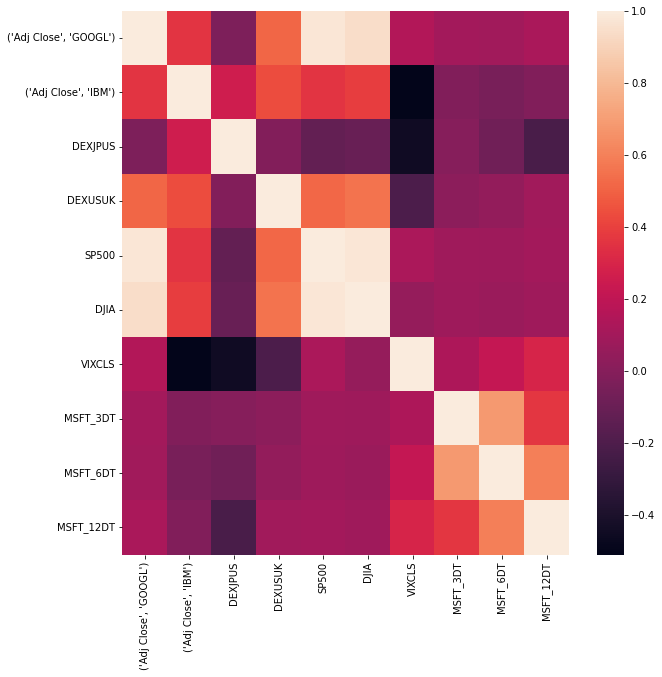

In [310]:
sns.heatmap(cor_data)

*   Reduce Corr() to Lower Matrix

In [311]:
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [312]:
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.362814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.027775,0.260960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.515736,0.438206,-0.009325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.981986,0.360138,-0.121192,0.520616,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.944267,0.389558,-0.105738,0.556271,0.980717,0.000000,0.000000,0.000000,0.000000,0.0
6,0.151459,-0.510288,-0.450385,-0.208928,0.132127,0.053144,0.000000,0.000000,0.000000,0.0
7,0.097768,-0.020431,-0.000345,0.024714,0.090144,0.080861,0.137663,0.000000,0.000000,0.0
8,0.094787,-0.049627,-0.078127,0.047094,0.079738,0.069285,0.220740,0.682601,0.000000,0.0
9,0.124658,-0.019192,-0.217800,0.092792,0.099620,0.086007,0.297431,0.363189,0.598706,0.0


*   Drop columns if |correlation value| > 0.9

In [313]:
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if abs(i) > 0.9 :
     to_drop.append(column)

In [314]:
to_drop

[('Adj Close', 'GOOGL'), ('Adj Close', 'GOOGL'), 'SP500']

In [315]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.060432,1.991963,1.372723,-1.302417,-1.185361,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
1,-1.056991,2.059871,1.365586,-1.319512,-1.189091,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2,-1.057584,2.098028,1.087271,-1.144764,-1.187649,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
3,-1.062837,2.075133,0.937409,-1.237837,-1.182505,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
4,-1.059774,1.926343,0.848205,-1.287222,-1.178994,-1.454897,-0.756844,-0.144516,-0.275424,-0.508281
...,...,...,...,...,...,...,...,...,...,...
1201,2.204939,0.892624,1.362018,0.135458,2.023992,1.754883,0.472878,1.744907,-1.250549,-1.917511
1202,2.266381,1.082864,1.597516,0.194340,2.142319,1.882534,0.260699,-0.002634,-2.662821,-3.051819
1203,2.363295,1.160552,1.636765,0.369089,2.211281,1.942015,-0.010798,-2.472102,-3.157542,-3.510321
1204,2.379812,1.248203,1.708128,0.492552,2.253870,1.986803,-0.087227,-3.003556,-3.462128,-3.203625


In [316]:
X.drop(to_drop, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [317]:
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,1.991963,1.372723,-1.302417,-1.476403,-0.816162,-0.259142,-0.298429,-0.513327
1,2.059871,1.365586,-1.319512,-1.468979,-0.796770,-0.226748,-0.281619,-0.524140
2,2.098028,1.087271,-1.144764,-1.461073,-0.800192,-0.185631,-0.368333,-0.504678
3,2.075133,0.937409,-1.237837,-1.458467,-0.827570,-0.218027,-0.295776,-0.511165
4,1.926343,0.848205,-1.287222,-1.454897,-0.756844,-0.144516,-0.275424,-0.508281
...,...,...,...,...,...,...,...,...
1201,0.892624,1.362018,0.135458,1.754883,0.472878,1.744907,-1.250549,-1.917511
1202,1.082864,1.597516,0.194340,1.882534,0.260699,-0.002634,-2.662821,-3.051819
1203,1.160552,1.636765,0.369089,1.942015,-0.010798,-2.472102,-3.157542,-3.510321
1204,1.248203,1.708128,0.492552,1.986803,-0.087227,-3.003556,-3.462128,-3.203625


* Train / Test Preparation

In [318]:
test_size = int(0.3 * len(X))
train_size = int(0.7 * len(X))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [319]:
# print(len(X))
# print(test_size)
# print(train_size)
# print(test_size+train_size)

# 5.2 (a) Model Training and Cross Validation
* Set number of fold / Seed value

In [320]:
num_fold = 7
seed = 4

* Cross Validation Model

In [321]:
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits=num_fold, shuffle = True, random_state=seed)

* Model selection

In [322]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#c_val ลองอย่างน้อย 3 ค่า [0.1, 1, 10, 100]
c_val = 1
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# 5.2 (b) Model Training and Cross Validation
* Calculate accuracy score for each model

In [323]:
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was

In [324]:
print('Linear regression : ',score_LM)
print('---------------------------------------------------------------------------')
print('SVR linear : ',score_lin)
print('---------------------------------------------------------------------------')
print('SVR Guassian : ',score_rbf)
print('---------------------------------------------------------------------------')
print('SVR Polynomial',score_poly)

Linear regression :  [0.8134101  0.85334146 0.86343678 0.87090388 0.8906961  0.85956317
 0.84992612]
---------------------------------------------------------------------------
SVR linear :  [0.85227445 0.77959596 0.80497416 0.80081387 0.86536039 0.80307035
 0.83961914]
---------------------------------------------------------------------------
SVR Guassian :  [0.41521346 0.25044142 0.32356179 0.33700161 0.31685316 0.31399503
 0.32937871]
---------------------------------------------------------------------------
SVR Polynomial [0.6224985  0.67734789 0.64161901 0.64161965 0.59223523 0.59653711
 0.61221392]


* View score k-fold

In [325]:
#Valication score comparison

score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':
score_poly})

score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],
'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

In [326]:
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.813410,0.852274,0.415213,0.622498
1,0.853341,0.779596,0.250441,0.677348
2,0.863437,0.804974,0.323562,0.641619
3,0.870904,0.800814,0.337002,0.641620
4,0.890696,0.865360,0.316853,0.592235
5,0.859563,0.803070,0.313995,0.596537
6,0.849926,0.839619,0.329379,0.612214


In [327]:
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.857325,0.820815,0.326635,0.626296


* Display( plot ( score ))

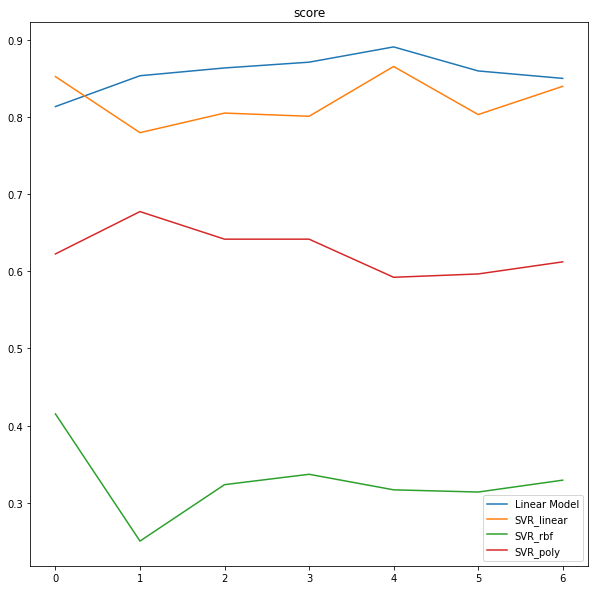

In [328]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(score['Linear Model'], label='Linear Model')
plt.plot(score['SVR_linear'], label='SVR_linear')
plt.plot(score['SVR_rbf'], label='SVR_rbf')
plt.plot(score['SVR_poly'], label='SVR_poly')
plt.title('score')
plt.legend(loc=4) # loc 4 = lower right

# 5.3 Prediction and Evaluation
* Predict all models ( LM, SVR_linear, SVR_rbf, SVR Poly )

In [363]:
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)

# svr_lin = SVR(kernel='linear', C=c_val)
# svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
# svr_poly = SVR(kernel='poly', C=c_val, degree=2)

svr_rbf_pred = svr_rbf.fit(X_train, Y_train).predict(X_test)
svr_lin_pred = svr_lin.fit(X_train, Y_train).predict(X_test)
svr_poly_pred = svr_poly.fit(X_train, Y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names on



* Scatter Plot ( X_test, Predict ) for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )



In [330]:
X_test.shape

(362, 8)

In [331]:
#X_test[X_test.columns[8]]

In [332]:
LM_pred.shape

(362, 1)

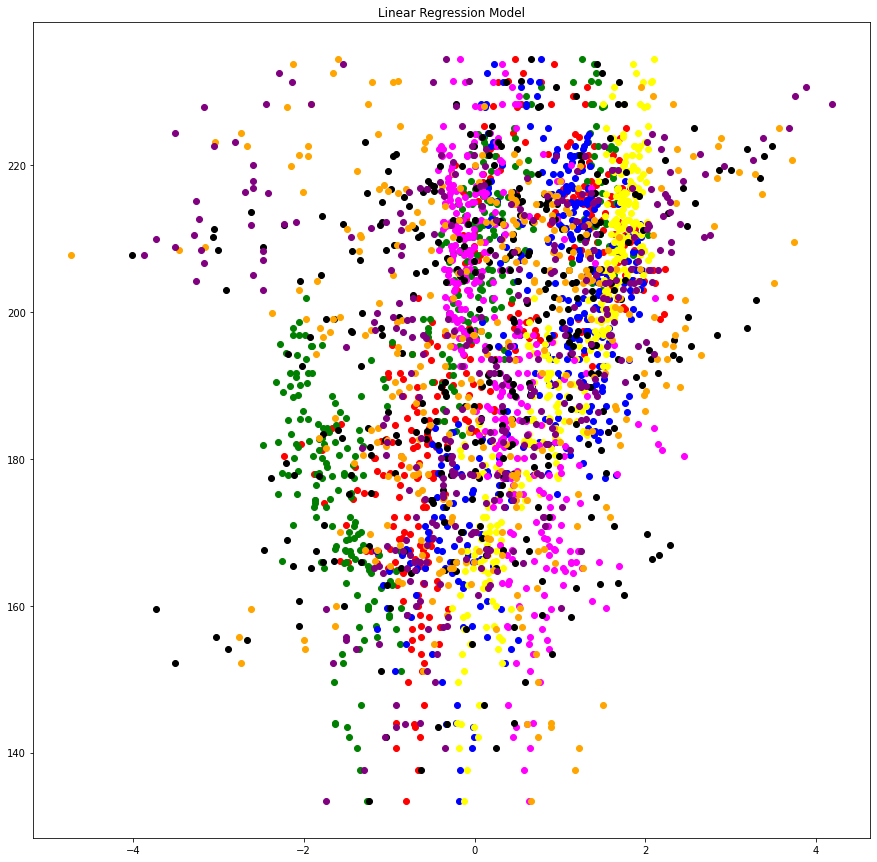

In [367]:
colors = np.array(["red","green","blue","yellow","magenta","black","orange","purple"])
plt.rcParams["figure.figsize"] = (15,15)
plt.title('Linear Regression Model')
for i in range(len(X_test.columns)): 
  plt.scatter(X_test[X_test.columns[i]], LM_pred,c=colors[i] )
  

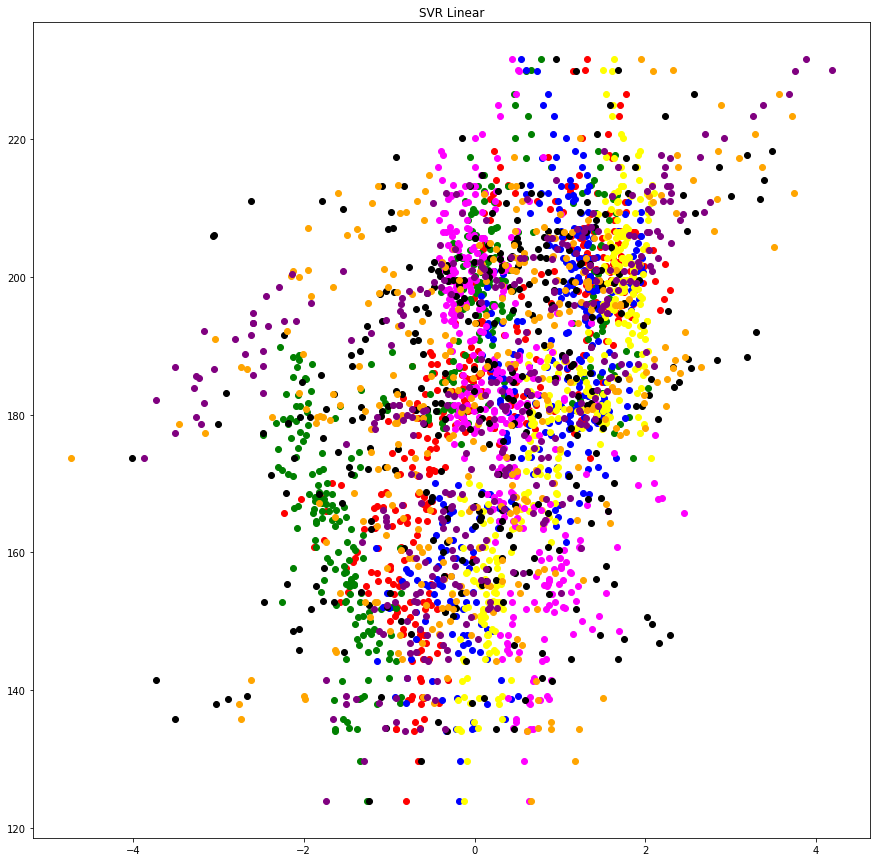

In [368]:
colors = np.array(["red","green","blue","yellow","magenta","black","orange","purple"])
plt.rcParams["figure.figsize"] = (15,15)
plt.title('SVR Linear')
for i in range(len(X_test.columns)): 
  plt.scatter(X_test[X_test.columns[i]], svr_lin_pred,c=colors[i] )

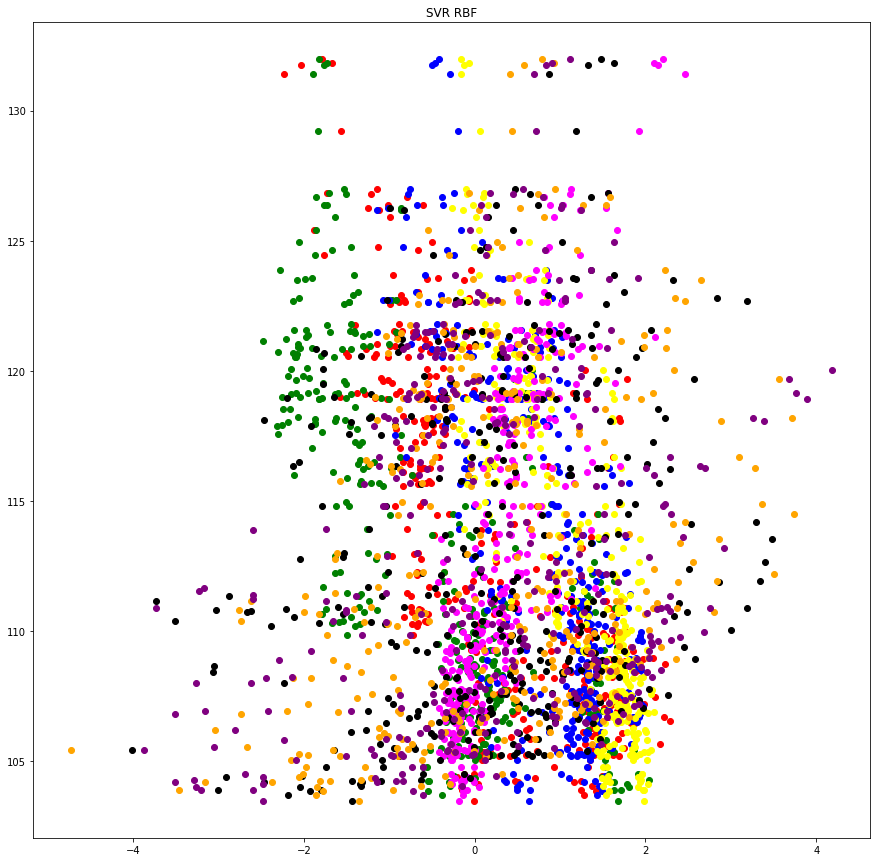

In [369]:
colors = np.array(["red","green","blue","yellow","magenta","black","orange","purple"])
plt.rcParams["figure.figsize"] = (15,15)
plt.title('SVR RBF')
for i in range(len(X_test.columns)): 
  plt.scatter(X_test[X_test.columns[i]], svr_rbf_pred,c=colors[i] )

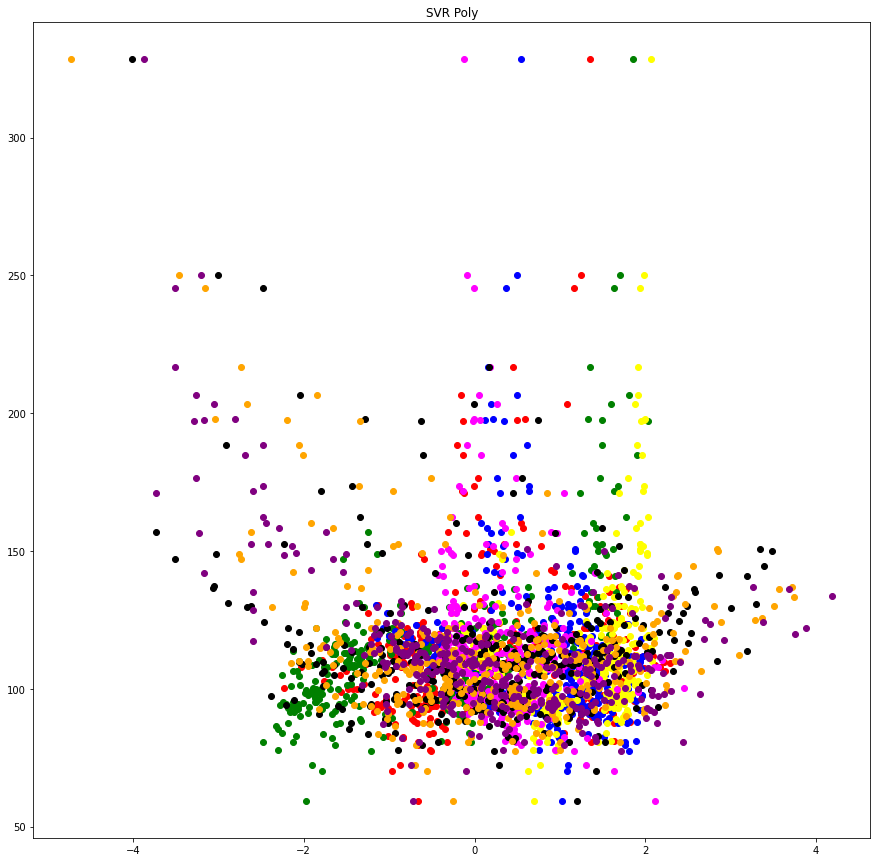

In [370]:
colors = np.array(["red","green","blue","yellow","magenta","black","orange","purple"])
plt.rcParams["figure.figsize"] = (15,15)
plt.title('SVR Poly')
for i in range(len(X_test.columns)): 
  plt.scatter(X_test[X_test.columns[i]], svr_poly_pred,c=colors[i] )

* Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )

In [374]:
#MSE
LM_MSE = metrics.mean_squared_error(Y_test, LM_pred)
SVR_LIN_MSE = metrics.mean_squared_error(Y_test, svr_lin_pred)
SVR_RBF_MSE = metrics.mean_squared_error(Y_test, svr_rbf_pred)
SVR_POLY_MSE = metrics.mean_squared_error(Y_test, svr_poly_pred)

#R2
LM_r2 = metrics.r2_score(Y_test, LM_pred)
SVR_LIN_r2 = metrics.r2_score(Y_test, svr_lin_pred)
SVR_RBF_r2 = metrics.r2_score(Y_test, svr_rbf_pred)
SVR_POLY_r2 = metrics.r2_score(Y_test, svr_poly_pred)

# Display Prediction MSE, R2 for all models

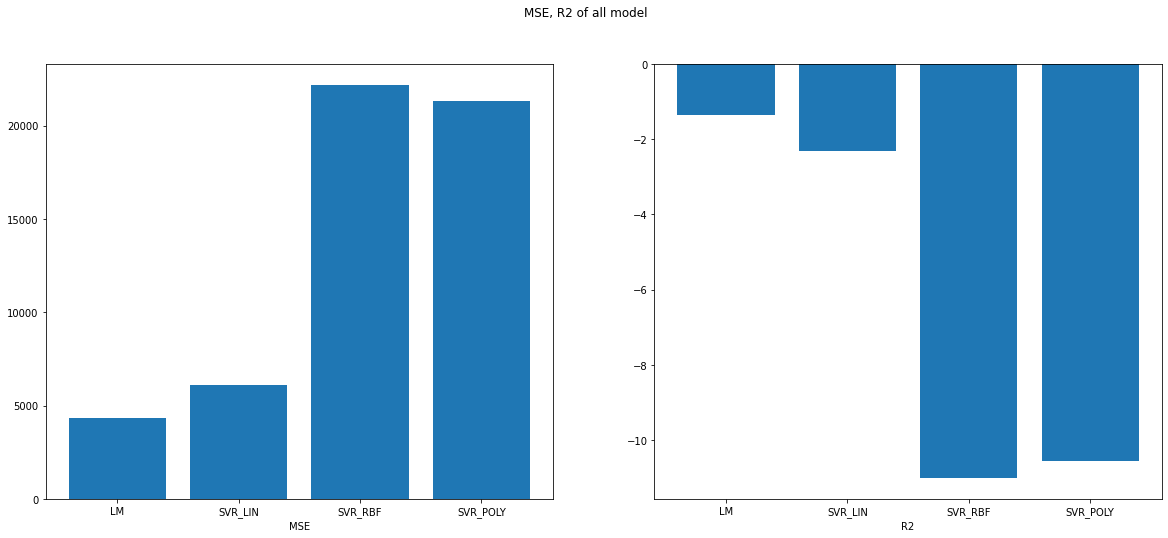

In [375]:
model_name = ['LM','SVR_LIN','SVR_RBF','SVR_POLY']
MSE_val = [LM_MSE, SVR_LIN_MSE, SVR_RBF_MSE, SVR_POLY_MSE]
R2_val = [LM_r2, SVR_LIN_r2, SVR_RBF_r2, SVR_POLY_r2]


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((20,8))
fig.suptitle('MSE, R2 of all model')
ax1.bar(model_name,MSE_val)



ax2.bar(model_name,R2_val)



#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('MSE')
ax2.set_xlabel('R2')
plt.show()